<a href="https://colab.research.google.com/github/Felipe-Oliveira11/TensorFlow-Callbacks/blob/master/Salvando_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Arquitetura MultiLayer Perceptron 



<br>
<hr>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, precision_score, average_precision_score, roc_auc_score


import tensorflow as tf
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# seed 
np.random.seed(42)

In [ ]:
path = '/content/drive/My Drive/Machine Learning - Notebooks/Marketing /campaigns.csv'
marketing = pd.read_csv(path)
marketing.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
marketing.drop('Unnamed: 0', axis=1, inplace=True)


# label target 
label = LabelEncoder()
marketing['y'] = label.fit_transform(marketing[['y']])


# tipo de variáveis 
cat_cols = marketing.select_dtypes(include=['object']).columns 
num_cols = marketing.select_dtypes(include=['float64', 'int64']).columns



# encoding categóricas 
dummies = pd.get_dummies(marketing[cat_cols], prefix=cat_cols, drop_first=True)
marketing = pd.concat([marketing, dummies], axis=1)
marketing.drop(cat_cols, axis=1, inplace=True)
marketing.shape


# split 
X = marketing.drop('y', axis=1)
y = marketing['y']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

# padronização
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
X_train.shape

(28483, 42)

In [ ]:
# Definindo Arquitetura 
model = Sequential()
model.add(InputLayer(input_shape=(42,))) # 42 é o número de colunas 
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['Precision', 'accuracy'])


# treino 
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
446/446 [==============================] - 1s 3ms/step - loss: 0.3643 - precision: 0.1359 - accuracy: 0.8538
Epoch 2/50
446/446 [==============================] - 1s 3ms/step - loss: 0.2523 - precision: 0.6403 - accuracy: 0.8938
Epoch 3/50
446/446 [==============================] - 1s 3ms/step - loss: 0.2260 - precision: 0.6284 - accuracy: 0.9043
Epoch 4/50
446/446 [==============================] - 1s 3ms/step - loss: 0.2213 - precision: 0.6273 - accuracy: 0.9062
Epoch 5/50
446/446 [==============================] - 1s 3ms/step - loss: 0.2197 - precision: 0.6231 - accuracy: 0.9056
Epoch 6/50
446/446 [==============================] - 1s 3ms/step - loss: 0.2188 - precision: 0.6231 - accuracy: 0.9055
Epoch 7/50
446/446 [==============================] - 1s 3ms/step - loss: 0.2179 - precision: 0.6237 - accuracy: 0.9059
Epoch 8/50
446/446 [==============================] - 1s 3ms/step - loss: 0.217

In [ ]:
# avaliando rede neural
binary_entropy, precision, accuracy = model.evaluate(X_test,  y_test, verbose=2)

382/382 - 1s - loss: 0.2137 - precision: 0.6341 - accuracy: 0.9053


In [ ]:
print('Precision: ', precision)

Precision:  0.6341072916984558


In [ ]:
# predições 
predictions = model.predict(X_test)
print(predictions)

[[0.0191062 ]
 [0.02250743]
 [0.00342463]
 ...
 [0.03601754]
 [0.01564984]
 [0.00380524]]


In [ ]:
# summary (resumo da Rede neural)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________
None


Text(0, 0.5, 'Loss Magnitude')

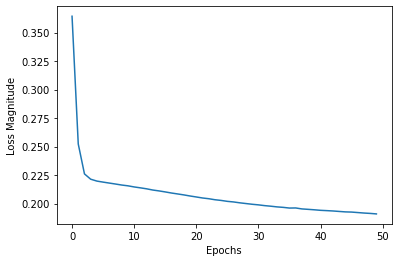

In [ ]:
# Curva do erro 
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss Magnitude')

In [ ]:
# métricas utilizadas 
print(model.metrics_names)

['loss', 'precision', 'accuracy']


In [ ]:
# métricas 
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10716
           1       0.63      0.53      0.58      1491

    accuracy                           0.91     12207
   macro avg       0.79      0.74      0.76     12207
weighted avg       0.90      0.91      0.90     12207



<br>
<br>
<hr>
<br>


### Salvando e Carregando Rede Neural 

Usando o formato SavedModel do TensorFlow para salvar e carregar a rede, estamos salvando e carregando a Rede por completa, com sua arquitetura, pesos e as informações de otimizadores, loss e métricas. 

A arquitetura do modelo e a configuração de treinamento (incluindo o otimizador, perdas e métricas) são armazenadas saved_model.pb. Os pesos são salvos no variables/diretório


Ele salva:

* Arquitetura da Rede neural 
* Pesos
* Compile() que possui Otimizador, loss e métricas 



<br>


#### <b> O que o SavedModel contém</b>:
A chamada model.save('my_model')cria uma pasta chamada my_model, contendo o seguinte:

* A arquitetura do modelo e a configuração de treinamento (incluindo o otimizador, perdas e métricas) são armazenadas saved_model.pb


* Os pesos são salvos no variables/diretório




<br>
<br>


In [ ]:
# salvar Rede neural 
model.save('my_NeuralNetwork', save_format='tf')

INFO:tensorflow:Assets written to: my_NeuralNetwork/assets


In [ ]:
# carregar modelo 
reconstructed_model = load_model('my_NeuralNetwork')

In [ ]:
np.random.seed(seed=42)
reconstructed_model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
446/446 [==============================] - 2s 4ms/step - loss: 0.1909 - precision: 0.6721 - accuracy: 0.9145 - val_loss: 0.2138 - val_precision: 0.6521 - val_accuracy: 0.9052
Epoch 2/20
446/446 [==============================] - 2s 4ms/step - loss: 0.1905 - precision: 0.6742 - accuracy: 0.9151 - val_loss: 0.2142 - val_precision: 0.6539 - val_accuracy: 0.9055
Epoch 3/20
446/446 [==============================] - 2s 4ms/step - loss: 0.1899 - precision: 0.6771 - accuracy: 0.9153 - val_loss: 0.2139 - val_precision: 0.6290 - val_accuracy: 0.9050
Epoch 4/20
446/446 [==============================] - 2s 4ms/step - loss: 0.1898 - precision: 0.6718 - accuracy: 0.9148 - val_loss: 0.2140 - val_precision: 0.6452 - val_accuracy: 0.9049
Epoch 5/20
446/446 [==============================] - 2s 4ms/step - loss: 0.1895 - precision: 0.6761 - accuracy: 0.9156 - val_loss: 0.2135 - val_precision: 0.6586 - val_accuracy: 0.9058
Epoch 6/20
446/446 [==============================] - 2s 4ms/step - lo

In [ ]:
 # predições com o modelo carregado 
 y_pred = reconstructed_model.predict_classes(X_test)
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10716
           1       0.65      0.48      0.55      1491

    accuracy                           0.91     12207
   macro avg       0.79      0.72      0.75     12207
weighted avg       0.90      0.91      0.90     12207

